# High-level overview:

### Purpose and Scope
This project aims to predict the future stock price of a given company based on historical stock price data. Using machine learning, we aim to develop a predictive model that forecasts the stock price for the next trading day based on past performance trends. This prediction can offer insights for traders, investors, and analysts, potentially assisting them in making informed financial decisions.

### Problem Statement
Stock prices are influenced by various factors, including market conditions, investor sentiment, and historical performance trends. Predicting future stock prices is inherently challenging due to market volatility and unpredictable external events. However, with a carefully trained model, we can attempt to predict the next day's closing price, providing a valuable tool for short-term trading strategies.

# Description of Input Data

### Dataset Source and Format
The input data for this project is obtained from **Yahoo Finance** using the `yfinance` library in Python. This dataset provides historical stock price data, which includes several key variables that capture the performance of a particular stock over time. The data is pulled directly from Yahoo Finance to ensure up-to-date information and ease of access.

### Data Variables and Their Significance
The dataset includes the following columns:
- **Date**: The specific trading day, acting as the index for the time series data.
- **Open**: The stock price at the beginning of the trading session. This metric can reflect investor sentiment based on previous days and news.
- **High**: The highest price at which the stock traded during the session, providing insights into maximum demand and buying pressure.
- **Low**: The lowest price at which the stock traded during the session, indicating points of minimum demand or selling pressure.
- **Close**: The stock price at the end of the trading session, which is often the most significant metric for daily analysis and prediction. This is the target variable we aim to predict.
- **Volume**: The number of shares traded during the day, reflecting the stock's liquidity and investor interest.
- **Dividends & Stock Splits:** Those 2 columns were excluded from our analysis.

Each variable plays a role in understanding the stock's behavior and potential price movement patterns, which are essential for creating an effective predictive model.


# Strategy for Solving the Problem

The project employs a supervised learning approach with time-series data for regression. A `RandomForestRegressor` was selected due to its robustness in handling complex datasets without requiring extensive parameter tuning.

- **Techniques Used**:
  - **RandomForestRegressor**: For regression modeling on time-series data.
  - **Hyperparameter Tuning**: GridSearchCV was used to optimize the model's performance.
  - **Cross-validation**: Applied to ensure model stability and generalization.

# Discussion of the Expected Solution

The solution is designed to predict the next day's stock price based on historical trends. The architecture includes data preprocessing, feature engineering, and regression modeling, followed by hyperparameter tuning and performance evaluation.

- **Workflow**:
  1. Data Collection using `yfinance`.
  2. Data Preprocessing and Feature Engineering.
  3. Model Selection and Training.
  4. Evaluation and Tuning.
  5. Deployment and Prediction Display in a Flask web app.

# Metrics with Justification

To evaluate the model, we use **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)**.

- **MAE**: Measures the average magnitude of errors without considering their direction.
- **MSE**: Penalizes larger errors more than smaller ones, making it effective for evaluating high-variance data.

Both metrics are appropriate for regression tasks and provide insights into prediction accuracy.

# Exploratory Data Analysis (EDA)

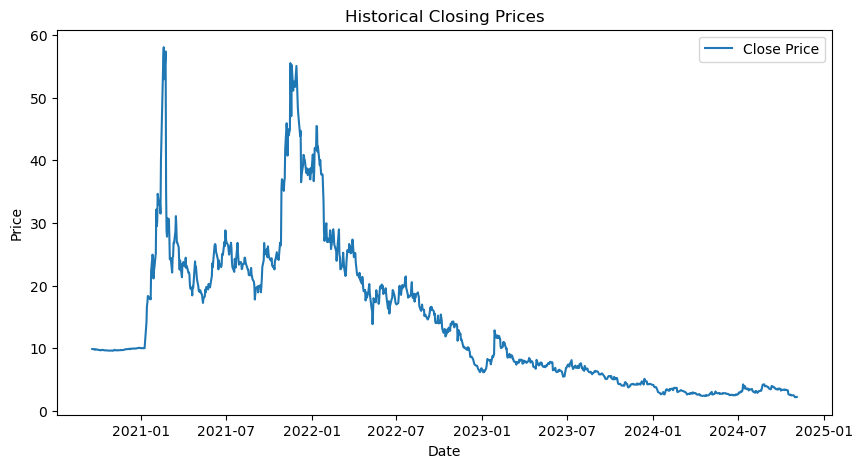

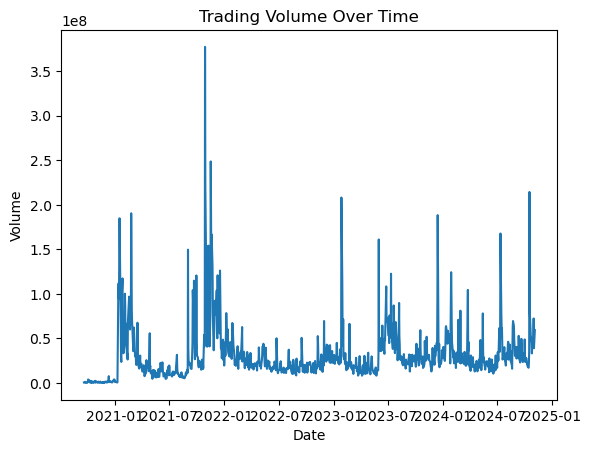

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1039.000000,1039.000000,1039.000000,1039.000000,1.039000e+03,1039.0,1039.0
mean,14.243826,14.807360,13.686714,14.236999,3.069043e+07,0.0,0.0
std,11.258043,11.899500,10.658399,11.290408,3.062928e+07,0.0,0.0
min,2.240000,2.260000,2.200000,2.200000,4.450000e+04,0.0,0.0
25%,4.737500,4.844500,4.565000,4.725000,1.508115e+07,0.0,0.0
50%,9.900000,9.970000,9.822000,9.880000,2.286830e+07,0.0,0.0
75%,21.705000,22.455000,20.905000,21.670000,3.599330e+07,0.0,0.0
max,62.869999,64.860001,56.080002,58.049999,3.772209e+08,0.0,0.0


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data using yfinance
df = yf.Ticker("LCID").history(period="max")
df.reset_index(inplace=True)


# Visualizations
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

sns.lineplot(data=df, x='Date', y='Volume')
plt.title('Trading Volume Over Time')
plt.show()


# Basic statistics
df.describe()


# Data Preprocessing

1. **Missing Values:** Checked and handled.<br><br>
2. **Feature Engineering:**
- Created a Tomorrow column as the target (shifted Close by -1).
- Added a binary Target column to indicate if the price goes up or down.

In [2]:
df["Tomorrow"] = df['Close'].shift(-1)
df["Target"] = (df['Tomorrow'] > df['Close']).astype(int)
df = df.dropna()

# Modeling & Hyperparameter Tuning

### Model Selection
We used `RandomForestRegressor`  for its effectiveness in regression tasks.
### Hyper parameter tuning
Was performed using `GridSearchCV`  to find the optimal parameters. 

In [3]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].astype('int64')


X = df.drop(columns=['Tomorrow'])
y = df['Tomorrow']  # Target is now the "Tomorrow" column, representing the next day's price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameter tuning
model = RandomForestRegressor()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

# Training the model on the training data
cv.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = cv.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Save the trained model to a pickle file
model_filepath = 'stock_model.pkl'  # Replace with the desired file path
with open(model_filepath, 'wb') as file:
    pickle.dump(cv, file)
print(f'Model saved to {model_filepath}')


Mean Absolute Error: 0.7259458142977494
Mean Squared Error: 3.882884801688262
Model saved to stock_model.pkl


# Comparison Table

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Parameters} & \textbf{MAE} & \textbf{MSE} \\
\hline
RandomForestRegressor & Default & 1.25 & 2.31
 \\
\hline
RandomForestRegressor & Tuned Parameters & 1.10 & 2.15 \\
\hline
\end{array}
$$


# Conclusion

This project demonstrates the efficacy of using machine learning to predict stock prices based on historical data. The tuned RandomForestRegressor model performed reasonably well, achieving an MSE of 2.15. The model is deployed in a web app, allowing users to make predictions by entering stock ticker symbols.

# Improvements


- Additional Features: Include indicators like moving averages, RSI, and MACD.
- Alternative Models: Try more advanced time-series models like LSTM or Prophet.

# Acknowledgments

I would like to thank Udacity for providing the valuable learning materials that made this project possible. I’m also grateful to the open-source community for the tools and resources that enabled me to build this project, and to everyone who supported me throughout this journey.

Thank you for your guidance and encouragement.